In [1]:
#Import useful package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#neural net
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('~/Desktop/python/creditcard.csv')

In [3]:
df.sample(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192199,129584.0,2.027976,-0.135482,-1.186711,0.231671,0.058848,-0.704630,0.081515,-0.166835,0.309475,...,-0.254719,-0.652831,0.282445,-0.336809,-0.289953,0.197671,-0.076613,-0.072196,8.99,0
46261,42706.0,0.975030,-0.423489,-1.755518,0.094099,1.988889,3.535835,-0.609439,0.918020,0.642748,...,-0.102297,-0.444334,-0.322102,0.913013,0.701423,0.632409,-0.010454,0.075197,150.00,0
120157,75727.0,1.486922,-1.086463,0.484085,-1.430507,-1.507152,-0.629807,-1.056280,-0.149255,-1.700191,...,-0.386408,-0.819650,0.095256,-0.173188,0.186286,-0.381455,0.037187,0.029133,39.20,0
141284,84216.0,-2.393304,2.075115,-0.680478,0.355277,-0.004704,-0.094707,-0.239552,-0.025173,-0.940470,...,0.574840,0.678928,-0.303534,-0.322934,-0.074168,-0.657310,-1.326786,-0.393645,42.80,0
14677,25897.0,-0.884922,0.402786,1.066210,-0.591343,1.511812,-0.567879,0.671943,-0.242683,-0.123145,...,-0.314344,-0.939742,-0.222700,-1.074280,-0.067949,-0.011592,-0.278088,-0.028187,1.98,0
90448,63024.0,1.215129,0.251481,0.310949,0.583453,-0.380013,-0.765540,-0.069893,-0.012579,-0.110430,...,-0.245589,-0.780355,0.126773,0.268084,0.160727,0.079814,-0.031715,0.018775,0.69,0
25593,33679.0,-0.224197,0.850409,1.637074,0.684177,0.435457,0.002104,1.043732,-0.346007,-0.484364,...,0.154131,0.774206,-0.195497,0.224610,-0.475985,-0.402985,-0.273249,-0.301366,18.43,0
156084,107236.0,-0.480844,0.710581,2.360350,-0.104984,-0.055559,-0.303450,0.401247,-0.138651,1.815161,...,-0.329028,-0.572796,-0.279561,-0.171327,0.180657,-0.718079,-0.088612,-0.151161,2.12,0
145696,87137.0,-1.448373,1.834326,-0.644457,-1.560632,1.184270,0.024212,1.374043,-0.497434,1.825302,...,-0.699804,-0.822504,-0.120904,-1.495983,-0.028155,0.163899,0.574102,-0.055153,8.95,0
223744,143502.0,1.717365,-0.894252,-0.631261,-0.312710,-0.540068,-0.043512,-0.406505,0.031067,0.653399,...,-0.135467,-0.627918,0.366698,0.763954,-0.825729,0.783368,-0.111547,-0.029591,149.25,0


In [4]:
df.Class.sum()

492

In [5]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.

In [6]:
X = df

In [7]:
y = X.Class

In [8]:
X.drop(['Class'], axis=1, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

/anaconda3/envs/root-copy/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


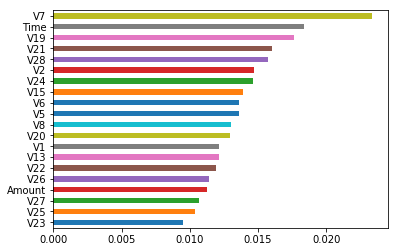

In [10]:
# plot feature importance
#feat_importance = plot_importance(model)
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [14]:
print('Score:'), model.score(X_test, y_test)

Score:


(None, 0.9995318501494888)

In [13]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,3))
mlp.fit(X_train, y_train)
mlp.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
mlp.score(X_test, y_test)

0.9984146743698596

In [16]:
y.value_counts()/len(y)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, y, cv=5)

array([0.998262  , 0.998262  , 0.99827952, 0.99827952, 0.99827952])